<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/jdecorte/machinelearning/blob/main/061-exercise_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

![](img/penguins.png)

In [4]:
penguins = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/penguins.csv')
penguins.tail(20)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
324,51.5,18.7,187.0,3250.0,2
325,49.8,17.3,198.0,3675.0,2
326,48.1,16.4,199.0,3325.0,2
327,51.4,19.0,201.0,3950.0,2
328,45.7,17.3,193.0,3600.0,2
329,50.7,19.7,203.0,4050.0,2
330,42.5,17.3,187.0,3350.0,2
331,52.2,18.8,197.0,3450.0,2
332,45.2,16.6,191.0,3250.0,2
333,49.3,19.9,203.0,4050.0,2


Get some general info about the dataset (type of each column, null values, ...)

In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


Drop rows containing NaN values.  
Check afterwards if there are no nulls left.

In [6]:
penguins = penguins.dropna()
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species


Is this a skewed dataset?

In [8]:
penguins['Species'].value_counts()

0    151
1    123
2     68
Name: Species, dtype: int64

What are the column names of the 4 features? (= What are the columns containing floats?)

In [9]:
penguins_features = penguins.select_dtypes(include=['float64']).columns
print(penguins_features)

Index(['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass'], dtype='object')


What are the different values for the classes?

In [13]:
penguins_classes = penguins['Species'].unique()
print(penguins_classes)

# 0 --> Adelie 
# 1 --> Gentoo
# 2 --> Chinstrap

[0 1 2]


Use a for - loop to loop through the penguin features and make the following boxplots  

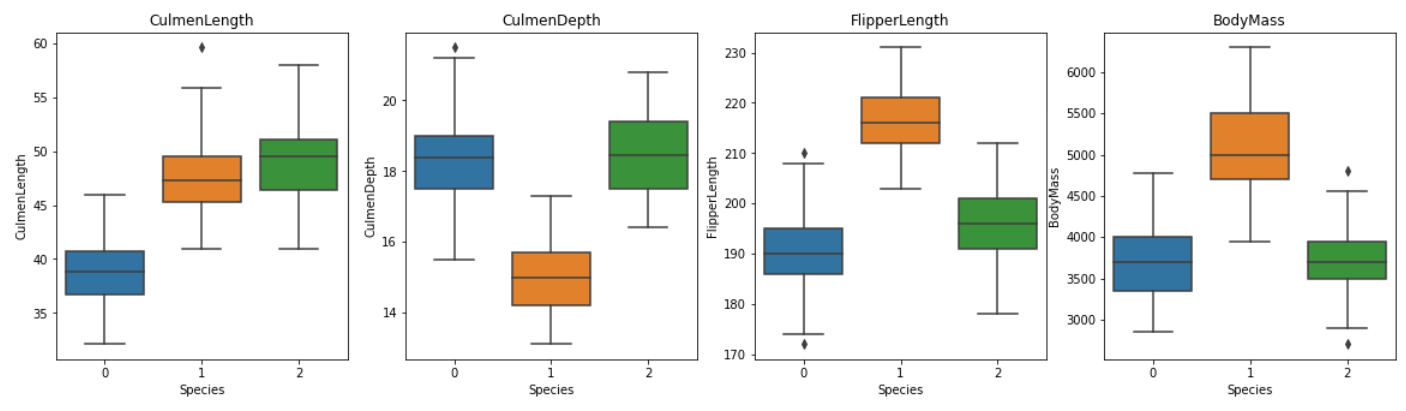

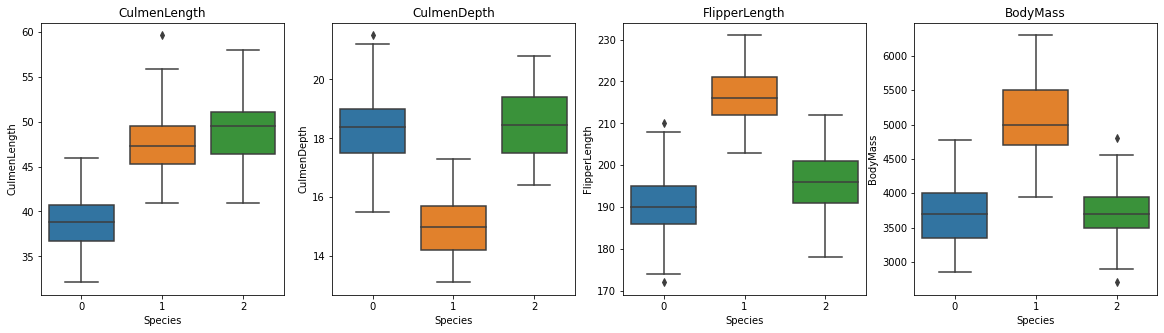

Make the following scatterplots

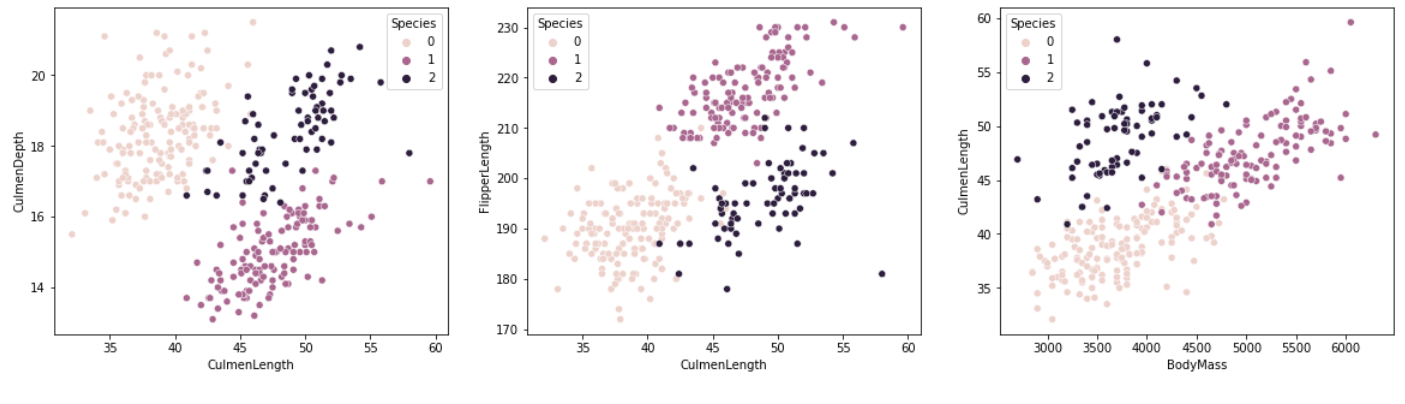

<AxesSubplot:xlabel='BodyMass', ylabel='CulmenLength'>

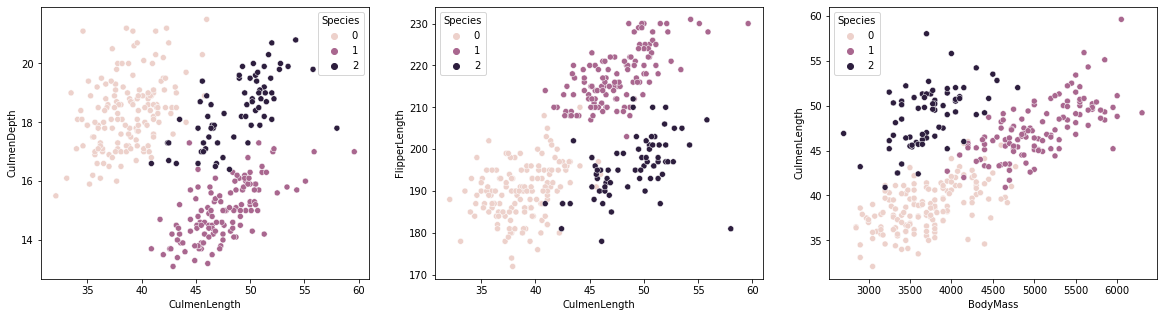

What is X and what is y?

What is X_train, y_train, X_test, y_test?

What is the number of records in X_train en X_test?

The number of records in X_train is: 256
The number of records in X_test is: 86


Declare a dictionary to use in GridSearchCV to find the best parameters.  
Which parameters does the DecisionTreeClassifier have? See [sklearn.tree.DecisionTreeClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Then use GridSearchCV to find the best values for the parameters when using the DecisionTreeClassifier.
What is the best model and the best score?

best estimator = DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.2, min_samples_split=0.1,
                       random_state=42)
best score = 0.9531235750114


Use the best model to make predictions on X_test.    
Determine the accuracy on the test set.   
Create the confusion matrix.

0.8953488372093024


Text(91.68, 0.5, 'Actual class')

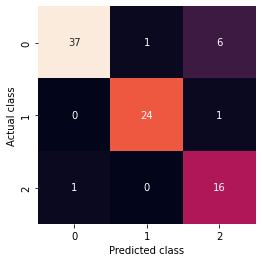

Find the probabilities for each prediction: 

[[0.00980392 0.95098039 0.03921569]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.09433962 0.01886792 0.88679245]
 [1.         0.         0.        ]
 [0.09433962 0.01886792 0.88679245]
 [0.00980392 0.95098039 0.03921569]
 [0.00980392 0.95098039 0.03921569]
 [0.09433962 0.01886792 0.88679245]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.00980392 0.95098039 0.03921569]
 [0.09433962 0.01886792 0.88679245]
 [0.00980392 0.95098039 0.03921569]
 [1.         0.         0.        ]
 [0.00980392 0.95098039 0.03921569]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.00980392 0.95098039 0.03921569]
 [1.         0.         0.        ]
 [0.00980392 0.95098039 0.03921569]
 [1.         0.         0.        ]
 [0.09433962 0.01886792 0.88679245]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.09433962 0.01886792 0.88679245]
 [0.00980392 0.95098039 0.03

Loop at the same time through the probabilities you found in the previous step and y_test, to find those penguins where the prediction was wrong.  
Use np.argmax(...) to get the index of the max element in the probabilities array.  

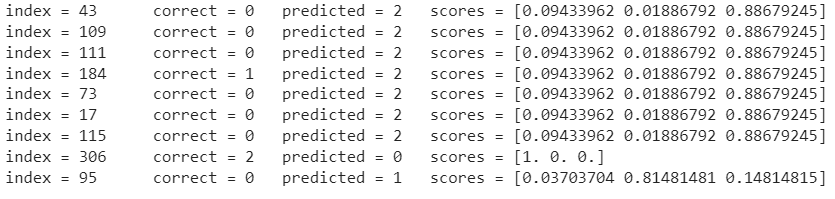

index = 43	correct = 0   predicted = 2   scores = [0.09433962 0.01886792 0.88679245]
index = 109	correct = 0   predicted = 2   scores = [0.09433962 0.01886792 0.88679245]
index = 111	correct = 0   predicted = 2   scores = [0.09433962 0.01886792 0.88679245]
index = 184	correct = 1   predicted = 2   scores = [0.09433962 0.01886792 0.88679245]
index = 73	correct = 0   predicted = 2   scores = [0.09433962 0.01886792 0.88679245]
index = 17	correct = 0   predicted = 2   scores = [0.09433962 0.01886792 0.88679245]
index = 115	correct = 0   predicted = 2   scores = [0.09433962 0.01886792 0.88679245]
index = 306	correct = 2   predicted = 0   scores = [1. 0. 0.]
index = 95	correct = 0   predicted = 1   scores = [0.00980392 0.95098039 0.03921569]


Make sure to understand the following Python code.  
This is based on [Interactive Visualization of Decision Trees with Jupyter Widgets](https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084)  
Change the names of variables to the appropriate values you've chosen.  
The confusion matrix of the test data was added to get an idea of how well a model is performing.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive


def plot_tree(crit, depth, min_split, min_leaf=0.2):
  dtc = DecisionTreeClassifier(random_state = 42, criterion = crit, max_depth = depth, min_samples_split=min_split, min_samples_leaf=min_leaf)
  dtc.fit(X_train, y_train)

  # !!! change feature_names to the correct names you've chosen !!!
  graph = Source(tree.export_graphviz(dtc, out_file=None, feature_names=features, class_names=['0', '1', '2'], filled = True))
  display(SVG(graph.pipe(format='svg')))


  # show confusion matrix for test set
   # !!! change the names to what you've chosen !!!
  y_pred = pipeline.predict(X_test)
  conf_mx = confusion_matrix(y_test, y_pred)
  cf = sns.heatmap(conf_mx,square=True, annot=True, fmt='d', cbar=False, xticklabels=penguin_classes, yticklabels=penguin_classes)
  cf.set_xlabel('Predicted class')
  cf.set_ylabel('Actual class')

  return dtc

inter=interactive(plot_tree, crit = ["gini", "entropy"], depth=[1,2,3,4,5], min_split=(0.1,1), min_leaf=(0.1,0.5))
display(inter)
